In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from dash import Dash,dcc,html,callback,Output,Input,dash_table
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots as msplots
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

In [3]:
df = pd.read_csv(URL)

In [4]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


<Axes: xlabel='Year'>

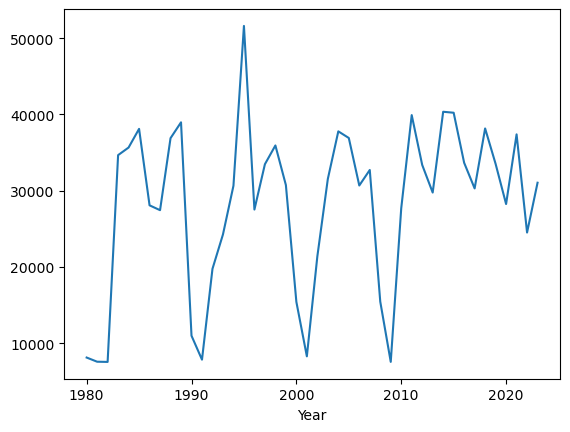

In [5]:
ys = df.groupby('Year')['Automobile_Sales'].sum()
ys.plot(x='Automobile_Sales',y='Year',kind='line')

In [6]:
different_vehicles = df['Vehicle_Type'].unique()
different_vehicles

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

In [7]:
Supperminicar = df.query('Vehicle_Type == "Supperminicar" and Recession == 1')
smini = Supperminicar.groupby('Year')['Automobile_Sales'].sum()
mfcs = df.query('Vehicle_Type == "Mediumfamilycar" and Recession == 1')
mfc = mfcs.groupby('Year')['Automobile_Sales'].sum()
sfcs = df.query('Vehicle_Type == "Smallfamiliycar" and Recession == 1')
sfc = sfcs.groupby('Year')['Automobile_Sales'].sum()
Sports = df.query('Vehicle_Type == "Sports" and Recession == 1')
sport = Sports.groupby('Year')['Automobile_Sales'].sum()
Excars = df.query('Vehicle_Type == "Executivecar" and Recession == 1')
excar = Excars.groupby('Year')['Automobile_Sales'].sum()

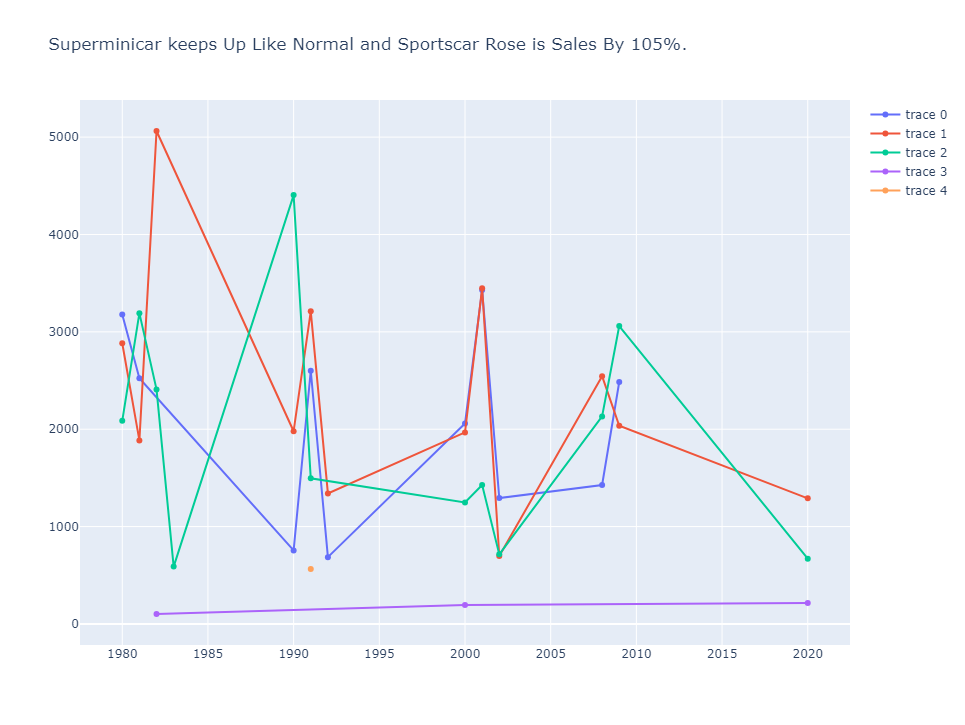

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=smini.index,y=smini))
fig.add_trace(go.Scatter(x=mfc.index,y=mfc))
fig.add_trace(go.Scatter(x=sfc.index,y=sfc))
fig.add_trace(go.Scatter(x=sport.index,y=sport))
fig.add_trace(go.Scatter(x=excar.index,y=excar))
fig.update_layout(height=725,width=900,title='Superminicar keeps Up Like Normal and Sportscar Rose is Sales By 105%.')

<Axes: xlabel='Vehicle_Type', ylabel='Automobile_Sales'>

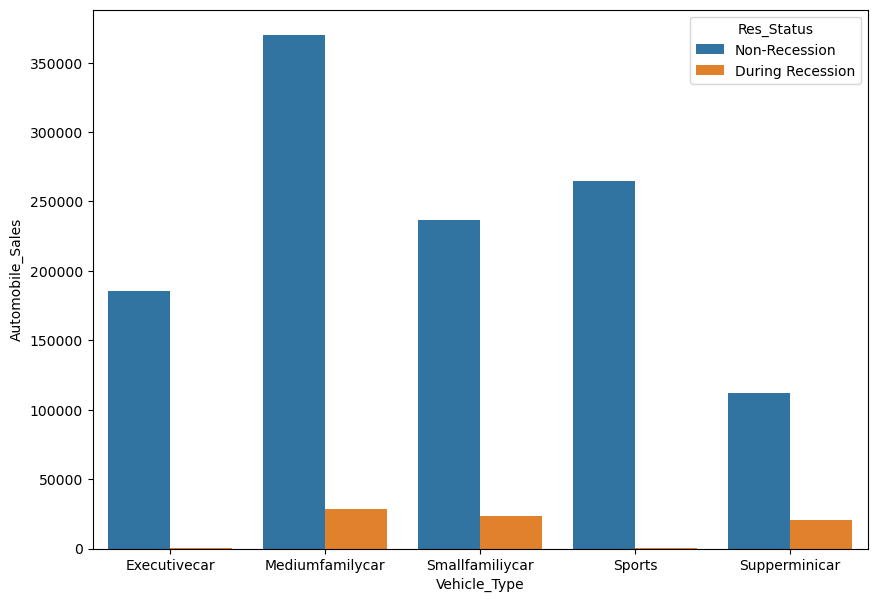

In [54]:
data = df[['Vehicle_Type','Recession','Automobile_Sales']].groupby(['Vehicle_Type','Recession'])['Automobile_Sales'].sum().reset_index()
data['Res_Status'] = data['Recession'].map({1: 'During Recession',0: 'Non-Recession'})
plt.figure(figsize=(10,7))
sns.barplot(data,x='Vehicle_Type',y='Automobile_Sales',hue='Res_Status')

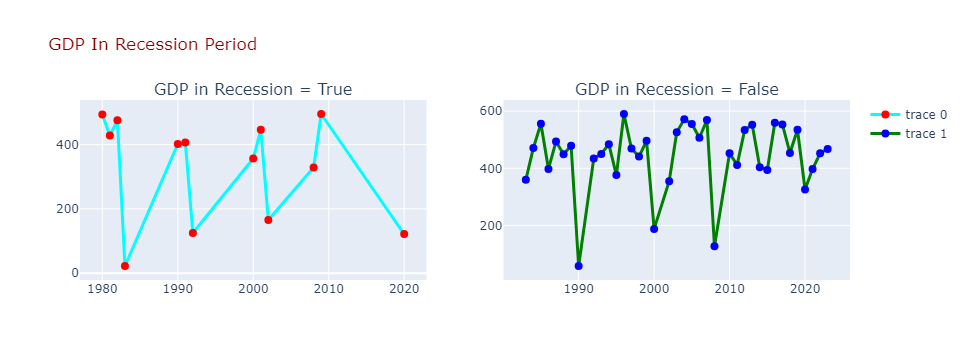

In [10]:
gdp = df[['Year','Recession','GDP']].query('Recession == 1')
gdpn = df[['Year','Recession','GDP']].query('Recession == 0')
rec1_gdp = gdp.groupby('Year')['GDP'].sum()
rec0_gdp = gdpn.groupby('Year')['GDP'].sum()
figure = msplots(rows = 1,cols = 2,subplot_titles=('GDP in Recession = True','GDP in Recession = False'))
figure.add_trace(go.Scatter(x=rec1_gdp.index,y=rec1_gdp,line=dict(color='cyan',width=3),marker=dict(size=8,color='red')),row = 1,col = 1)
figure.add_trace(go.Scatter(x=rec0_gdp.index,y=rec0_gdp,mode='lines+markers',line=dict(color='green',width=3),marker=dict(size=8,color='Blue')),row = 1,col = 2)
figure.update_layout(title='GDP In Recession Period',title_font_color='darkred')

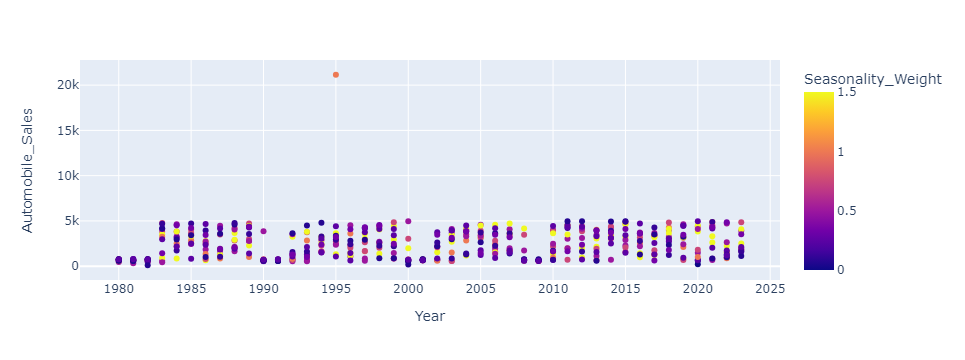

In [11]:
px.scatter(df,x='Year',y='Automobile_Sales',color='Seasonality_Weight')

In [12]:
corre = df[['Year','Automobile_Sales','Price','Recession']].query('Recession == 1')
corr = corre.groupby('Year')['Automobile_Sales'].sum()
cor = corre.groupby('Year')['Price'].mean()
corre_plot = pd.DataFrame({'Automobile_Sales':corr,'Average_Price':cor})

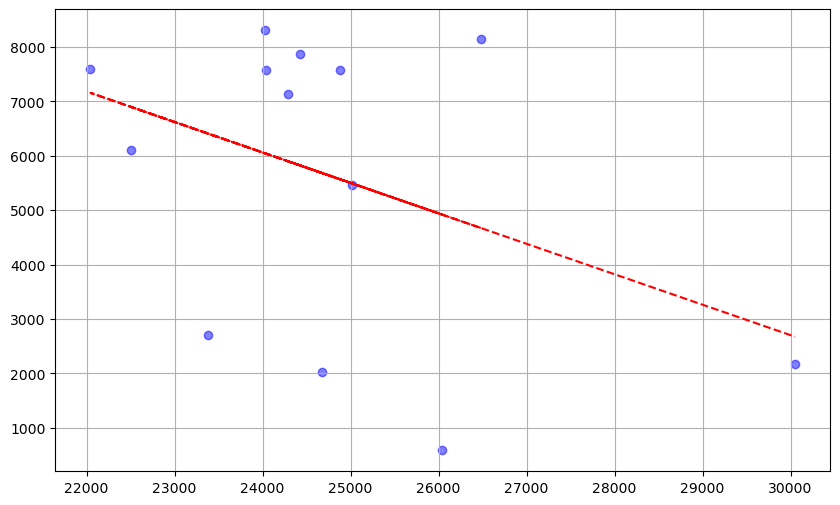

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(y=corre_plot['Automobile_Sales'],x=corre_plot['Average_Price'],color='Blue',alpha=0.5)
trend=np.polyfit(corre_plot['Average_Price'],corre_plot['Automobile_Sales'],1)
line = np.poly1d(trend)
plt.plot(corre_plot['Average_Price'], line(corre_plot['Average_Price']),'r--')
plt.grid(True)

Text(0, 0.5, '')

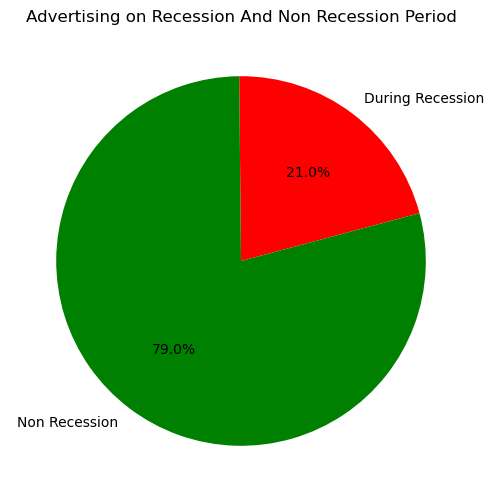

In [14]:
pie = df.query('Recession == 1')['Advertising_Expenditure'].sum()
piee = df.query('Recession == 0')['Advertising_Expenditure'].sum()
data = {'Ad_Re1':pie,'Ad_Re0':piee}
pies= pd.Series(data)
plt.figure(figsize=(6,6))
pies.plot.pie(autopct='%1.1f%%',colors=['red','green'],labels=['During Recession','Non Recession'],startangle=15)
plt.title('Advertising on Recession And Non Recession Period')
plt.ylabel('')

Text(0, 0.5, '')

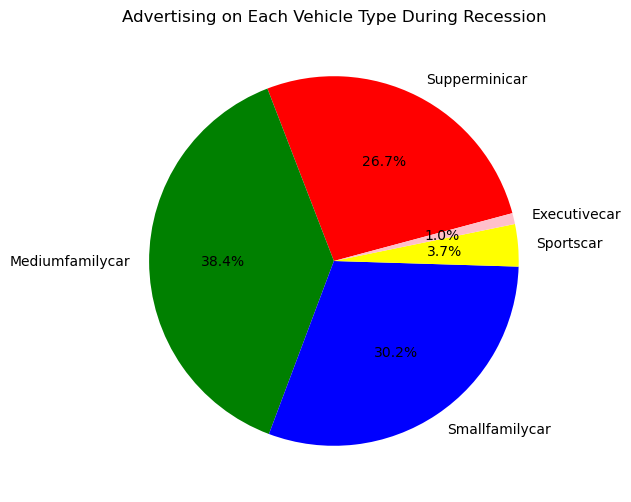

In [15]:
piees1 = df.query('Recession == 1 and Vehicle_Type == "Supperminicar"')['Advertising_Expenditure'].sum()
piees2 = df.query('Recession == 1 and Vehicle_Type == "Mediumfamilycar"')['Advertising_Expenditure'].sum()
piees3 = df.query('Recession == 1 and Vehicle_Type == "Smallfamiliycar"')['Advertising_Expenditure'].sum()
piees4 = df.query('Recession == 1 and Vehicle_Type == "Sports"')['Advertising_Expenditure'].sum()
piees5 = df.query('Recession == 1 and Vehicle_Type == "Executivecar"')['Advertising_Expenditure'].sum()

plo = {'Supperminicar':piees1,'Mediumfamilycar':piees2,'Smallfamilycar':piees3,'Sportscar':piees4,'Executivecar':piees5}
ploy = pd.Series(plo)

plt.figure(figsize=(6,6))
ploy.plot.pie(autopct='%1.1f%%',colors=['red','green','blue','yellow','pink'],startangle=15)
plt.title('Advertising on Each Vehicle Type During Recession')
plt.ylabel('')

In [16]:
wdata = df.query('Recession == 1')
data1 = wdata.query('Vehicle_Type == "Supperminicar"')[['unemployment_rate','Automobile_Sales','Year']]
data2 = wdata.query('Vehicle_Type == "Mediumfamilycar"')[['unemployment_rate','Automobile_Sales','Year']]
data3 = wdata.query('Vehicle_Type == "Smallfamiliycar"')[['unemployment_rate','Automobile_Sales','Year']]
data4 = wdata.query('Vehicle_Type == "Sports"')[['unemployment_rate','Automobile_Sales','Year']]
data5 = wdata.query('Vehicle_Type == "Executivecar"')[['unemployment_rate','Automobile_Sales','Year']]

In [18]:
dat1 = data1.groupby('Year')[['unemployment_rate','Automobile_Sales']].sum()
dat2 = data2.groupby('Year')[['unemployment_rate','Automobile_Sales']].sum()
dat3 = data3.groupby('Year')[['unemployment_rate','Automobile_Sales']].sum()
dat4 = data4.groupby('Year')[['unemployment_rate','Automobile_Sales']].sum()
dat5 = data5.groupby('Year')[['unemployment_rate','Automobile_Sales']].sum()

<Axes: xlabel='Year', ylabel='Automobile_Sales'>

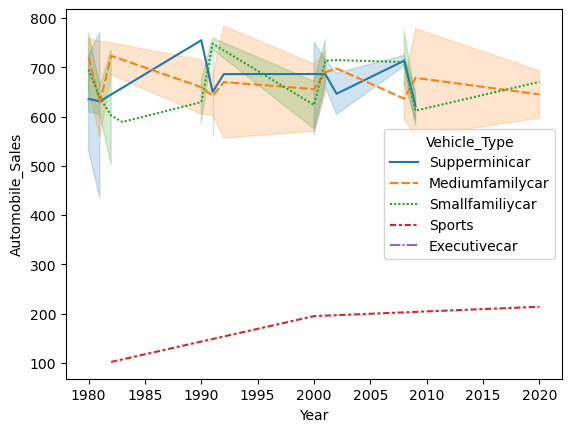

In [60]:
res_data = df[df['Recession']==1]
sns.lineplot(res_data,x='Year',y='Automobile_Sales',hue='Vehicle_Type',style='Vehicle_Type')

In [81]:
dat = df[['Year','Automobile_Sales','Recession']].groupby(['Year','Recession'])['Automobile_Sales'].sum().reset_index()
da = df[['Year','Automobile_Sales','Recession','Vehicle_Type']].groupby(['Year','Recession','Vehicle_Type'])['Price'].sum().reset_index()
nomonths = df[['Year','Automobile_Sales']].groupby('Year')['Automobile_Sales'].sum

In [147]:
from dash import Dash,dcc,html,callback,Input,Output,dash_table
app = Dash(__name__)
app.layout=html.Div([
    html.H1('Data Visualization Project',style={'textAlign':"center"}),
    
    html.Div([
        html.Label('Recession Period Statistics'),
        dcc.Dropdown(
        id='Recession-Period',
        options=[{'label':"Recession",'value':1},{'label':'Non-Recession','value':0}],
        value=0
        )
        ],style={'width': '40%', 'display': 'inline-block', 'verticalAlign': 'top'}), 
    
    html.Div([
        html.Label('Yealry Report Statistics'),
        dcc.Dropdown(
        id='Yearly-Report',
        options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
        value=df['Year'].min()
        )
        ],style={'width': '55%', 'display': 'inline-block', 'verticalAlign': 'top'}), 
    
        html.Div(id='output-graph',className='output-div',children=[
            dcc.Graph(id='Recession-Graph'),
            dcc.Graph(id='Yearly-Graph')
        ], style={'display': 'flex', 'flexDirection': 'row'})
    
])

@app.callback(
    Output('Recession-Graph','figure'),
    Input('Recession-Period','value')
)

def update_graph(selected_period):
    data = dat[dat['Recession'] == selected_period]
    fig = px.line(data,x='Year',y='Automobile_Sales')
    fig.update_layout(height=225,width=350)
    return fig

@app.callback(
    Output('Yearly-Graph', 'figure'),
    Input('Yearly-Report', 'value')
)
def update_price_graph(selected_year):
    datas = df[df['Year'] == selected_year]
    figs = px.line(datas, y='Month', x='Automobile_Sales',color='Vehicle_Type', title='Sales Per Year')
    figs.update_layout(height=360,width=600)
    return figs

app.run_server(mode='external',debug=True)


---------------------------------------------------------------------------
NoLayoutException                         Traceback (most recent call last)
NoLayoutException: The layout was `None` at the time that `run_server` was called.
Make sure to set the `layout` attribute of your application
before running the server.

